In [38]:
# import libraries
# uncomment to show plots in separate window:
#%matplotlib qt5  
# comment to show plots in separate window:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.close("all")

Výpočet

![Alt text](zapoctak3.png)

Nalezení příslušných koeficientů pro Besselovy funkce, které by umožnili splnění okrajových podmínek, jsem provedl pomocí numerického výpočtu. 

\begin{equation*}
R(r) = A_l J_l(kr) + B_l Y_l (kr)
\end{equation*}

\begin{equation*}
\text{okrajová podmínka: }
R(r=R_1) = A_l J_l(kR_1) + B_l Y_l (kR_1) = 0, \quad => \quad B_l = -\frac{J_l(kR_1)}{Y_l(kR_1)} A_l
\end{equation*}

\begin{equation*}
R(r) = A_l J_l(kr) - A_l \frac{J_l(kR_1)}{Y_l(kR_1)} Y_l(kr)
\end{equation*}

\begin{equation*}
\text{druhá okrajová podmínka:}
R(R_2) = A_l J_l(kR_2) - A_l \frac{J_l(kR_1)}{Y_l(kR_1)} Y_l (kR_2)
\end{equation*}

\begin{equation*}
C_l = \frac{A_l}{Y_l (kR_1)}
\end{equation*}

\begin{equation*}
R(R_2) = C_l [ Y_l(kR_1)J_l(kR_2) - J_l(kR_1) Y_l(kR_2) ] = 0
\end{equation*}

\begin{equation*}
Y_l(kR_1)J_l(kR_2) - J_l(kR_1) Y_l(kR_2) = 0 \quad => \text{možná }k 
\end{equation*}

Graf levé strany poslední uvedené rovnice pro různé hodnoty $k$. Průsečíky tohoto grafu s nulou odhalí, kdy je podmínka z poslední rovnice splněna a bude tak získán diskrétní set možných $k$ (kvantování).

C:\Users\tomas\AppData\Local\Temp\ipykernel_17100\199048249.py:8: RuntimeWarning: invalid value encountered in subtract
  f[l] = sp.yv(l, k*R_1) * sp.jv(l, k*R_2) - sp.jv(l, k*R_1) * sp.yv(l, k*R_2)
C:\Users\tomas\AppData\Local\Temp\ipykernel_17100\199048249.py:8: RuntimeWarning: invalid value encountered in multiply
  f[l] = sp.yv(l, k*R_1) * sp.jv(l, k*R_2) - sp.jv(l, k*R_1) * sp.yv(l, k*R_2)


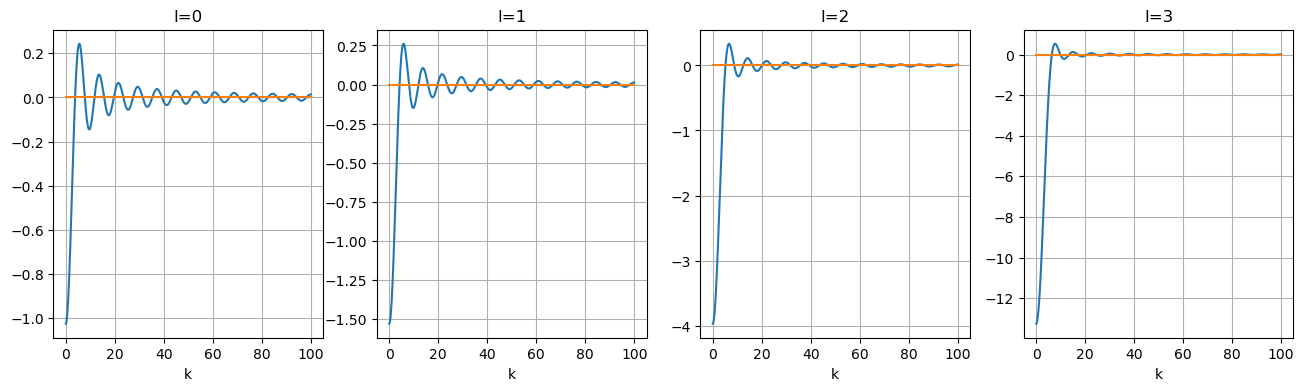

In [39]:
R_1 = 0.2
R_2 = 1
k = np.linspace(0,100,5000)
l_max = 30

f = np.zeros((l_max,len(k)))
for l in (np.arange(l_max)):
    f[l] = sp.yv(l, k*R_1) * sp.jv(l, k*R_2) - sp.jv(l, k*R_1) * sp.yv(l, k*R_2)

fig, ax = plt.subplots(1,4, figsize=(16,4))
for i in range(4):
    ax[i].plot(k,f[i])
    ax[i].set_title("l={}".format(i))
    ax[i].set_xlabel("k")
    ax[i].plot([0,100], [0,0])
    ax[i].grid(True)

Hledání průsečíků grafů s nulou a zapsání příslušných hodnot $k$ do proměnné k_valid. Každý řádek k_valid přísluší jedné hodnotě $l$.

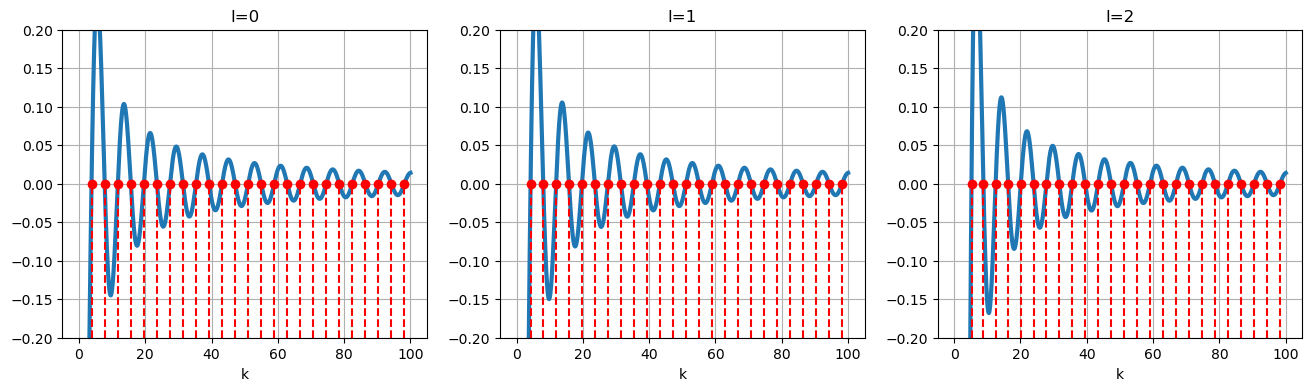

In [40]:
# find k values that fulfill condition (1) for l in range 1, 2, ... , l_max
valid_k = [np.array([]) for _ in range(l_max)]

for l in (np.arange(l_max)):
    for n in np.arange(len(k)-1):
        if f[l,n] * f[l,n+1] < 0:
            valid_k[l] = np.append(valid_k[l], k[n+1])

fig, ax = plt.subplots(1,3, figsize=(16,4))
for i in range(3):
    ax[i].plot(k,f[i], linewidth=3)
    ax[i].set_ylim(-0.2, 0.2)
    ax[i].set_title("l={}".format(i))
    for j in range(len(valid_k[i])):
        ax[i].plot([valid_k[i][j], valid_k[i][j]], [-0.2, 0], "r--")
    ax[i].plot(valid_k[i], np.zeros(len(valid_k[i])), "ro")
    ax[i].set_xlabel("k")
    ax[i].grid(True)
plt.show()

\begin{equation*}
R(r) = A_l J_l(kr) - A_l \frac{J_l(kR_1)}{Y_l(kR_1)} Y_l(kr)
\end{equation*}

$R(r)$ pro pár nejnižších možných $k$ pro zadané  $l$ $\quad (R(r) \text{ není normovaná})$

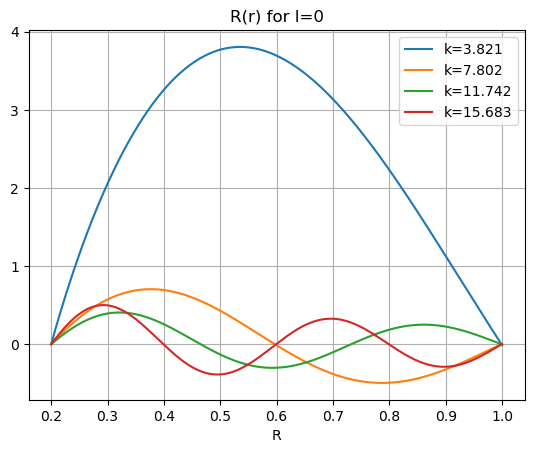

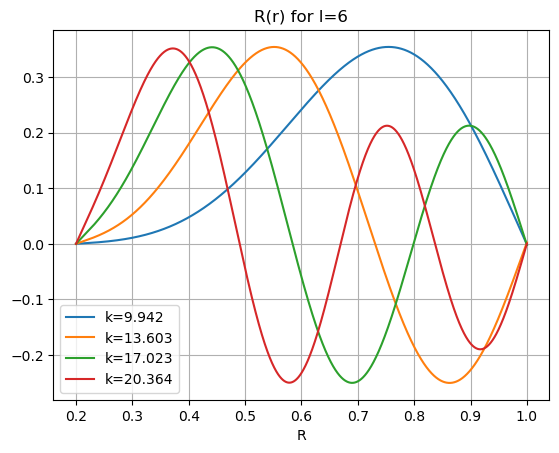

In [41]:
r = np.linspace(R_1, R_2, 5000)
l = 0
for i in range(4):
    k = valid_k[l][i]
    if sp.jv(l,k*(R_1+0.01)) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*(R_1+0.01)) > 0:
        plt.plot(r, sp.jv(l,k*r) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*r), label="k={:.3f}".format(k))
    else:
        plt.plot(r, -(sp.jv(l,k*r) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*r)), label="k={:.3f}".format(k))
plt.grid(True)
plt.title("R(r) for l={}".format(l))
plt.xlabel("R")
plt.legend()

plt.figure()
l = 6
for i in range(4):
    k = valid_k[l][i]
    if sp.jv(l,k*(R_1+0.01)) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*(R_1+0.01)) > 0:
        plt.plot(r, sp.jv(l,k*r) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*r), label="k={:.3f}".format(k))
    else:
        plt.plot(r, -(sp.jv(l,k*r) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*r)), label="k={:.3f}".format(k))
plt.grid(True)
plt.title("R(r) for l={}".format(l))
plt.xlabel("R")
plt.legend()

\begin{equation*}
\psi(r,\phi) = R(r)F(\phi) = \left(A_l J_l(kr) - A_l \frac{J_l(kR_1)}{Y_l(kR_1)} Y_l(kr) \right) \mathrm{e}^{il\phi} \quad l \in Z
\end{equation*}

\begin{equation*}
E_{k_z, n, l} = \frac{\hbar^2 k_z^2}{2m} + \frac{\hbar^2 k_{n,l}^2}{2m}
\end{equation*}

3D graf hustoty pravděpodobnosti pro některý ze stacionárních stavů

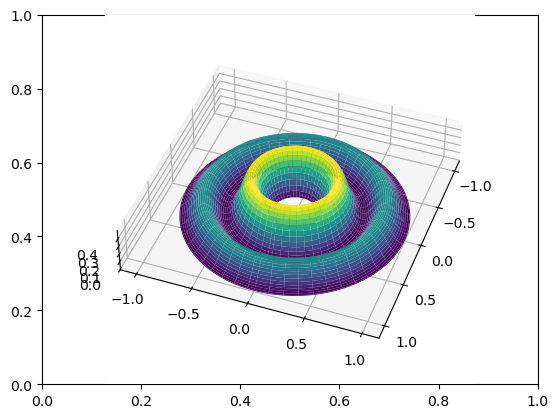

In [46]:
l = 0
k = valid_k[l][1]
phi = np.linspace(0,2*np.pi,100)
r = np.linspace(R_1,R_2,100)
r, phi = np.meshgrid(r, phi)
psi = (sp.jv(l,k*r) - sp.jv(l,k*R_1)/sp.yv(l,k*R_1)*sp.yv(l,k*r)) * np.exp(1j*2*phi*l)

x = r * np.cos(phi)
y = r * np.sin(phi)

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, np.abs(psi)**2, cmap='viridis')
ax.set_box_aspect([5,5,1])
ax.view_init(elev=43, azim=20)
plt.show()